## Visualize the result of the Linear Multiclassifier

We compare the optimized beam splitter network with the performances of the pretty good measurements (PGM).

In [63]:
import numpy as np
import pandas as pd
import qsensoropt.plot_utils as pu
from dolinar import helstrom_bound
import matplotlib.pyplot as plt
from math import pi
from os.path import join
from os import makedirs
from numpy import loadtxt, zeros, ones, linspace, squeeze

In [168]:
######################
batchsize = 2048
num_steps = 12
num_hypothesis = 9
log_loss = False
cumulative_loss = True
######################

In [169]:
def generate_name(
    batchsize: int, num_steps: int, num_hypothesis: int,
    log_loss: bool, cumulative_loss: bool, random: bool = False,
):
    name = f"multiclassifier_{num_hypothesis}"
    name += "_random" if random else ""
    name += f"_batchsize_{batchsize}_num_steps_"+\
        f"{num_steps}_max_resources_{num_steps:.2f}_"+\
        f"ll_{log_loss}_cl_{cumulative_loss}"
    return name

In [170]:
name = generate_name(
    batchsize, num_steps, num_hypothesis,
    log_loss, cumulative_loss, 
)
name_rnd = generate_name(
    batchsize, num_steps, num_hypothesis,
    log_loss, cumulative_loss, random=True,
)

In [171]:
prec_df = pd.read_csv(
    f'./linear_multiclassifier/data/{name}_eval.csv',
)
prec_rnd_df = pd.read_csv(
    f'./linear_multiclassifier/data/{name_rnd}_eval.csv',
)

In [172]:
if num_hypothesis==3:
        new_line = pd.DataFrame(
            {'Resources': [0.0000e+00], 'ProbError': [6.6666e-01]},
        )
elif num_hypothesis==5:
    new_line = pd.DataFrame(
        {'Resources': [0.0000e+00], 'ProbError': [8.0000e-01]},
    )
elif num_hypothesis==7:
    new_line = pd.DataFrame(
        {'Resources': [0.0000e+00], 'ProbError': [8.5714e-01]},
    )
else:
    new_line = pd.DataFrame(
        {'Resources': [0.0000e+00], 'ProbError': [8.8888e-01]},
    )
if prec_df.iloc[0].values[0]!=0.0:
    # Trained BS network overwrite of the file
    prec_df = pd.concat(
        [new_line, prec_df], ignore_index=True,
    )
    prec_df.to_csv(
        f'./linear_multiclassifier/data/{name}_eval.csv',
        index=False,
    )
if prec_rnd_df.iloc[0].values[0]!=0.0:
    # Random BS netwok
    prec_rnd_df = pd.concat(
        [new_line, prec_rnd_df], ignore_index=True,
    )
    prec_rnd_df.to_csv(
        f'./linear_multiclassifier/data/{name_rnd}_eval.csv',
        index=False,
    )

In [173]:
prec_rnd_df["NumLayers"] = prec_rnd_df["Resources"]
prec_df["NumLayers"] = prec_df["Resources"]

In [174]:
img_dir = f'./linear_multiclassifier/images/{name}'
makedirs(img_dir, exist_ok=True)

In [175]:
pgm_3, pgm_5, pgm_7, pgm_9 = 0.0286*np.ones((num_steps+1, )), \
    0.1868*np.ones((num_steps+1, )), 0.3751*np.ones((num_steps+1, )), \
    0.5086*np.ones((num_steps+1, ))

In [176]:
res = np.linspace(0, num_steps, num_steps+1)

In [177]:
pgm_df_3, pgm_df_5, pgm_df_7, pgm_df_9 = \
    pd.DataFrame({"NumLayers": res, "ProbError": pgm_3}), \
    pd.DataFrame({"NumLayers": res, "ProbError": pgm_5}), \
    pd.DataFrame({"NumLayers": res, "ProbError": pgm_7}), \
    pd.DataFrame({"NumLayers": res, "ProbError": pgm_9})

In [178]:
lower_bound_df = pd.read_csv(
    f'./linear_multiclassifier/data/pgm_{num_hypothesis}.csv',
)
lower_bound_df["NumLayers"] = lower_bound_df["Resources"]

In [179]:
list_pgm = [pgm_df_3, pgm_df_5, pgm_df_7, pgm_df_9]
if num_hypothesis==3:
    index = 0
elif num_hypothesis==5:
    index = 1
elif num_hypothesis==7:
    index = 2
elif num_hypothesis==9:
    index = 3
else:
    print("Error!")

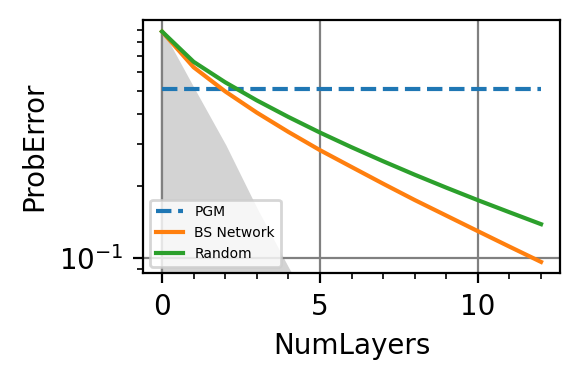

In [182]:
pu.plot_multiples(
    [list_pgm[index], prec_df, prec_rnd_df,],
    "NumLayers", "ProbError", 
    ["PGM", "BS Network", "Random"],
    figsize=(3, 2), dpi=200,
    legend_location="lower left",
    #title="Precision",
    path=img_dir,
    log_scale_x=False,
    list_line_syles = ['dashed', 'solid', 'solid'],
    lower_bound_df=lower_bound_df,
)